## 🌳 Decision Trees

Decision trees are one type of machine learning models that operate by deriving decision rules from the training set and using them for prediction purposes. Let $A$, $B$ and $C$ be some categorical features in the dataset and $W$ and $Z$ be some continuous features and let lowercase letters represent possible values for them. In this case, a general decision rule can takes the form:

$$(A=a) ∧ (B=b) ∧ (C=c) ∧ (W>w) ∧ (Z>z) ⟹ [y=k] $$

Each path (and hence, leave) in a decision tree corresponds to a rule like this. 

$\text{The training of the tree occurs as follow:}$

- Choose a feature (e.g., $A$ or $W$) and split it into ($A=a_1$, $A=a_2$, ..., $A=a_n$ or $W>w, W ≤ W$ )
   
    - Splitting means to add as child nodes (it's splitting in the sense that the training data will be distributed over them)

    - Multiple techniques were covered to choose the best feature

- For each of the $n$ splits (i.e., children), repeat the process with the remaining features (e.g., $B$, $C$, $W$ and $Z$)

- Stop when all instances are pure (i.e., all training points satisfying the conditions along the path from the root have the same label $y=k$) or when some other condition is met (e.g., to avoid overfitting).

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Plot import plot_model_contours

### 😎  We are Wearing our Machine Learning Engineer Spectacles Early This Time:

```python
TODO 1: Study the hyperparameters of the DecisionTreeClassifier as found in the documentation and answer the following:
```
1. Does increasing `min_samples_split` encourage a deeper or shallower tree and what effect does this have on overfitting?

In [2]:
"""
Answer goes here.
it is minimum number of samples required to split a node.
If a node has fewer samples than this, it becomes a leaf.

if n small->tree split very aggressively(high depth and leafs contains low samples) —>overfitting.
if n large->tree will barely split (shallower tree)—> underfitting.
"""

'\nAnswer goes here.\nit is minimum number of samples required to split a node.\nIf a node has fewer samples than this, it becomes a leaf.\n\nif n small->tree split very aggressively(high depth and leafs contains low samples) —>overfitting.\nif n large->tree will barely split (shallower tree)—> underfitting.\n'

2. Answer the same question for increasing `min_impurity_decrease` and relate it to an equation in the lecture (try to write it here).

In [ ]:
"""
Answer goes here.
this parameter controls whether a node should be split based on how much it reduces impurity (information gain)
I(parent) - weighted avg of I(childrens) 

Higher min_impurity_decrease=>fewer splits =>shallower tree=> underfitting.

Lower min_impurity_decrease=>more splits=> tree deeper =>overfitting.

"""

'\nAnswer goes here.\nthis parameter controls whether a node should be split based on how much it reduces impurity (information gain)\nI(parent) - weighted avg of I(childrens) \n\nHigher min_impurity_decrease=>fewer splits =>shallower tree=> risk of overfitting can happens underfitting.\n\nLower min_impurity_decrease=>more splits=> tree deeper =>increasing the risk of overfitting.\n\n'

3. Devise an example where `min_samples_split=a` and `min_samples_leaf=b` and a split on a node is prevented although it has number of samples `c` where `c>a`.

In [4]:
"""
Answer goes here. Can use https://tree.nathanfriend.io/ or draw it on paper or use a diagram tool.

lets say c=1000 and a=200 and b=400
.
└── parent(1000)/
    ├── -ch1(700)
    └── -ch2(300)

since c>a then the min sample split pass
but since ch2(300) has 300 sample which is less than b so we stop splitting it.


"""

'\nAnswer goes here. Can use https://tree.nathanfriend.io/ or draw it on paper or use a diagram tool.\n\nlets say c=1000 and a=200 and b=400\n.\n└── parent(1000)/\n    ├── -ch1(700)\n    └── -ch2(300)\n\nsince c>a then the min sample split pass\nbut since ch2(300) has 300 sample which is less than b so we stop splitting it.\n\n\n'

It's important to note that the decision tree will keep training (splitting nodes) until all leaves are pure, one of the three conditions above stops any further node from splitting or `max_depth` hyperparameter is reached.

### 🐧 Load Penguins Dataset

You've done this many time in the past. So let's get over it quick:

In [5]:
# read the dataset
df = pd.read_csv('penguins.csv')                    # has many features and three classes (Penguin type)

# drop unwanted columns for the purposes of this experiment
df = df.drop(['studyName', 'Sample Number', 'Date Egg', 'Comments', 'Island', 'Stage', 'Individual ID',
              'Clutch Completion', 'Sex', 'Region'], axis=1)
df = df.drop(['Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis=1)

# drop missing values
df = df.dropna()

# save for easier access later
df.to_csv('penguins-clean.csv', index=False)
df

,Species,Culmen Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,3250.0
4,Adelie Penguin (Pygoscelis adeliae),36.7,3450.0
5,Adelie Penguin (Pygoscelis adeliae),39.3,3650.0
...,...,...,...
338,Gentoo penguin (Pygoscelis papua),47.2,4925.0
340,Gentoo penguin (Pygoscelis papua),46.8,4850.0
341,Gentoo penguin (Pygoscelis papua),50.4,5750.0
342,Gentoo penguin (Pygoscelis papua),45.2,5200.0


Extract `x_data` and `y_data`

In [6]:
x_data_pd, y_data_pd = df.drop(columns=['Species']), df['Species']          
x_data, y_data = x_data_pd.to_numpy(), y_data_pd.to_numpy()
y_data = LabelEncoder().fit_transform(y_data)                               # convert labels to integers

### 👀 Decision Trees in Action

Let's start by studying the performance of the decision tree on the Penguins dataset.

In [7]:
# TODO 2: Define a decision tree classifier with max_depth=3 and random_state=42
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
# TODO 3: Study the performance with 5-fold cross-validation (return the mean accuracy)
acc = cross_val_score(clf, x_data, y_data, cv=5).mean()  # mean accuracy
round(acc, 3)   

np.float64(0.909)

Let's see what did the decision tree have to go through to result in this. We will use the package `dtreeviz` to visualize it (which looks better and is more informative than the visualization provided by `Scikit-learn`)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


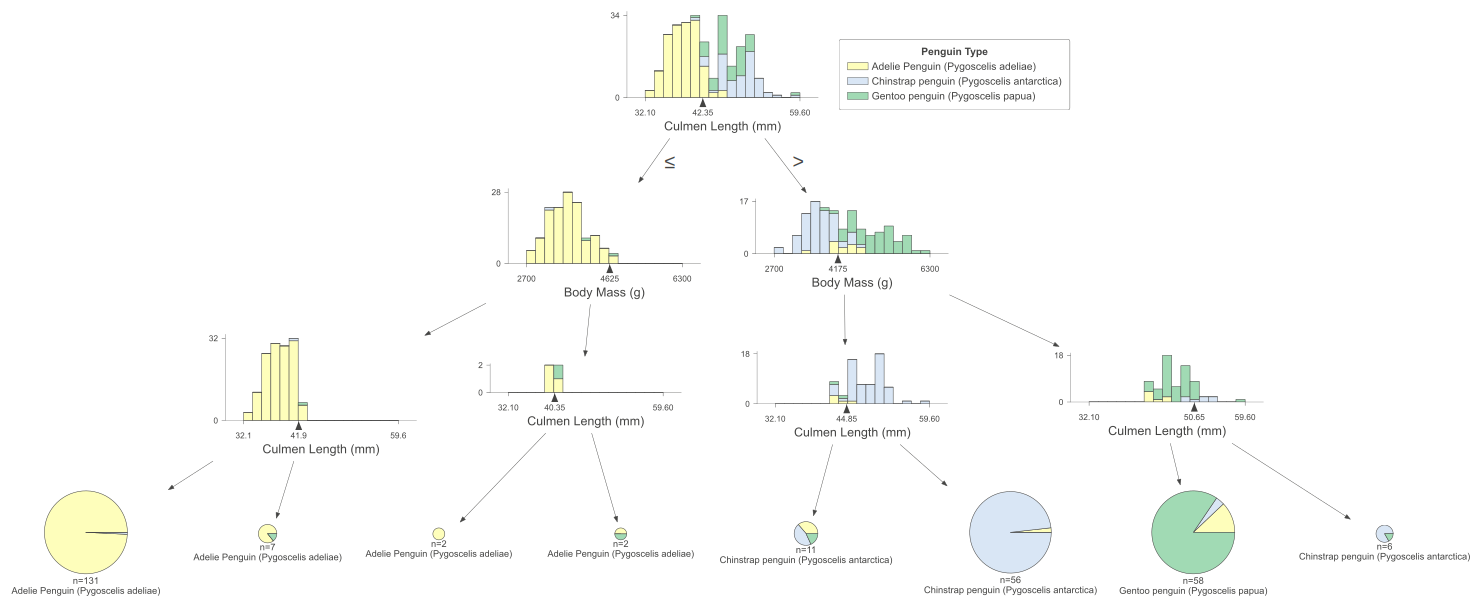

In [8]:
import dtreeviz         # install me with pip install dtreeviz

# To simulate an arbitrary fold
m = x_data.shape[0]
x_train, y_train = x_data[:int(0.8*m),:], y_data[:int(0.8*m),]
clf.fit(x_train, y_train)


plt.style.use("default")
viz = dtreeviz.model(clf, x_train, y_train, target_name='Penguin Type', feature_names=x_data_pd.columns, class_names=np.unique(y_data_pd))
viz.view(scale=1.4) 

```python
TODO 4: What do you think makes splitting at 4175 for the second node in the second level better than any other value? 
```

In [ ]:
"""
Answer goes here.
because it is like a normal distribution and 4175 is decision boundry
also in continues we choose what minimize variance 
"""

'\nAnswer goes here.\n'

```python
TODO 5: How many decision rules where found by this decision tree? Which three rules are the strongest and why?
```

In [ ]:
"""
Answer goes here.
3 rules mainly
"""

'\nAnswer goes here.\n'

Now as we have seen, the 90% accuracy is not so satisfactory. Let's dee if we can do better with hyperparameter search.

#### 🔍 Initialize Random Search

In [11]:
# TODO 6: Define a DecisionTree classifier with random_state=42
clf = DecisionTreeClassifier(random_state=42)

# TODO 7: Define the hyperparameter search distribution
param_dist = {
    'min_samples_split':np.arange(2,51),                      # 2 to 50
    'min_samples_leaf': np.arange(1,21),                       # 1 to 20
    'max_depth': np.arange(5,51,5),                              # 5 to 50 with step of 5
    'min_impurity_decrease':  np.linspace(0.0, 0.5, 20)                  # Decide a reasonable range here (with 20 values)
}

# TODO 8: Initialize the Random Search object with 200 iterations, 5-fold cross-validation and random_state=42
clf_searched = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=200,
    cv=5,
    random_state=42,
    n_jobs=-1
)

#### 🔍 Perform the Search

In [12]:
# fit the wrapped model (i.e., search and set the best hyperparameters)
clf_searched.fit(x_data, y_data)

### let's look at the top scores and the used hyperparameters:
relevant_columns = ['param_min_samples_split', 'param_min_samples_leaf', 'param_max_depth', 'param_min_impurity_decrease', 
                    'mean_test_score', 'std_test_score', 'rank_test_score']
cv_results_df = pd.DataFrame(clf_searched.cv_results_)[relevant_columns].round(decimals=3).sort_values(by='rank_test_score')
# above we filtered the clf_searched.cv_results_ as it has other irrelevant columns then rounded all values in it and sorted by score

cv_results_df.head(10)

,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_min_impurity_decrease,mean_test_score,std_test_score,rank_test_score
156,2,6,35,0.000,0.918,0.023,1
0,48,9,35,0.105,0.915,0.030,2
4,27,7,35,0.053,0.915,0.030,2
3,12,17,30,0.132,0.915,0.030,2
21,2,6,20,0.158,0.915,0.030,2
19,6,20,20,0.000,0.915,0.030,2
18,36,16,5,0.000,0.915,0.030,2
15,30,19,15,0.026,0.915,0.030,2
26,27,1,45,0.079,0.915,0.030,2
29,4,5,25,0.158,0.915,0.030,2


As we can see, the best score is not that good. Let's plot to understand more:

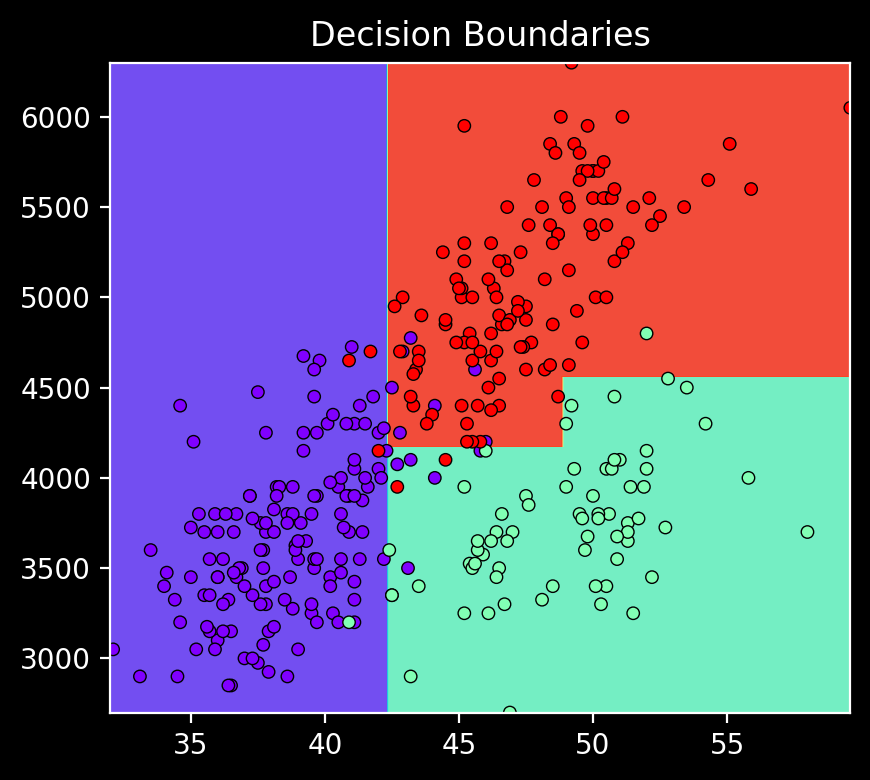

In [13]:
plot_model_contours(clf_searched,  x_data, y_data, trained=True)

```python
TODO 9: Given the plot, comment on what disadvantage of decision trees, as covered in the lecture, is most likely the reason for the mediocre performance. Comparing the boundary to the ideal decision boundary shall be helpful in this.
```

In [ ]:
'''
Answer goes here.
Only axis-aligned splits of data
optimal would be 45 degree with perpendicular lines to this 45
'''

### 🌀 Decision Trees and Overfitting:

Hyperparameters: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]


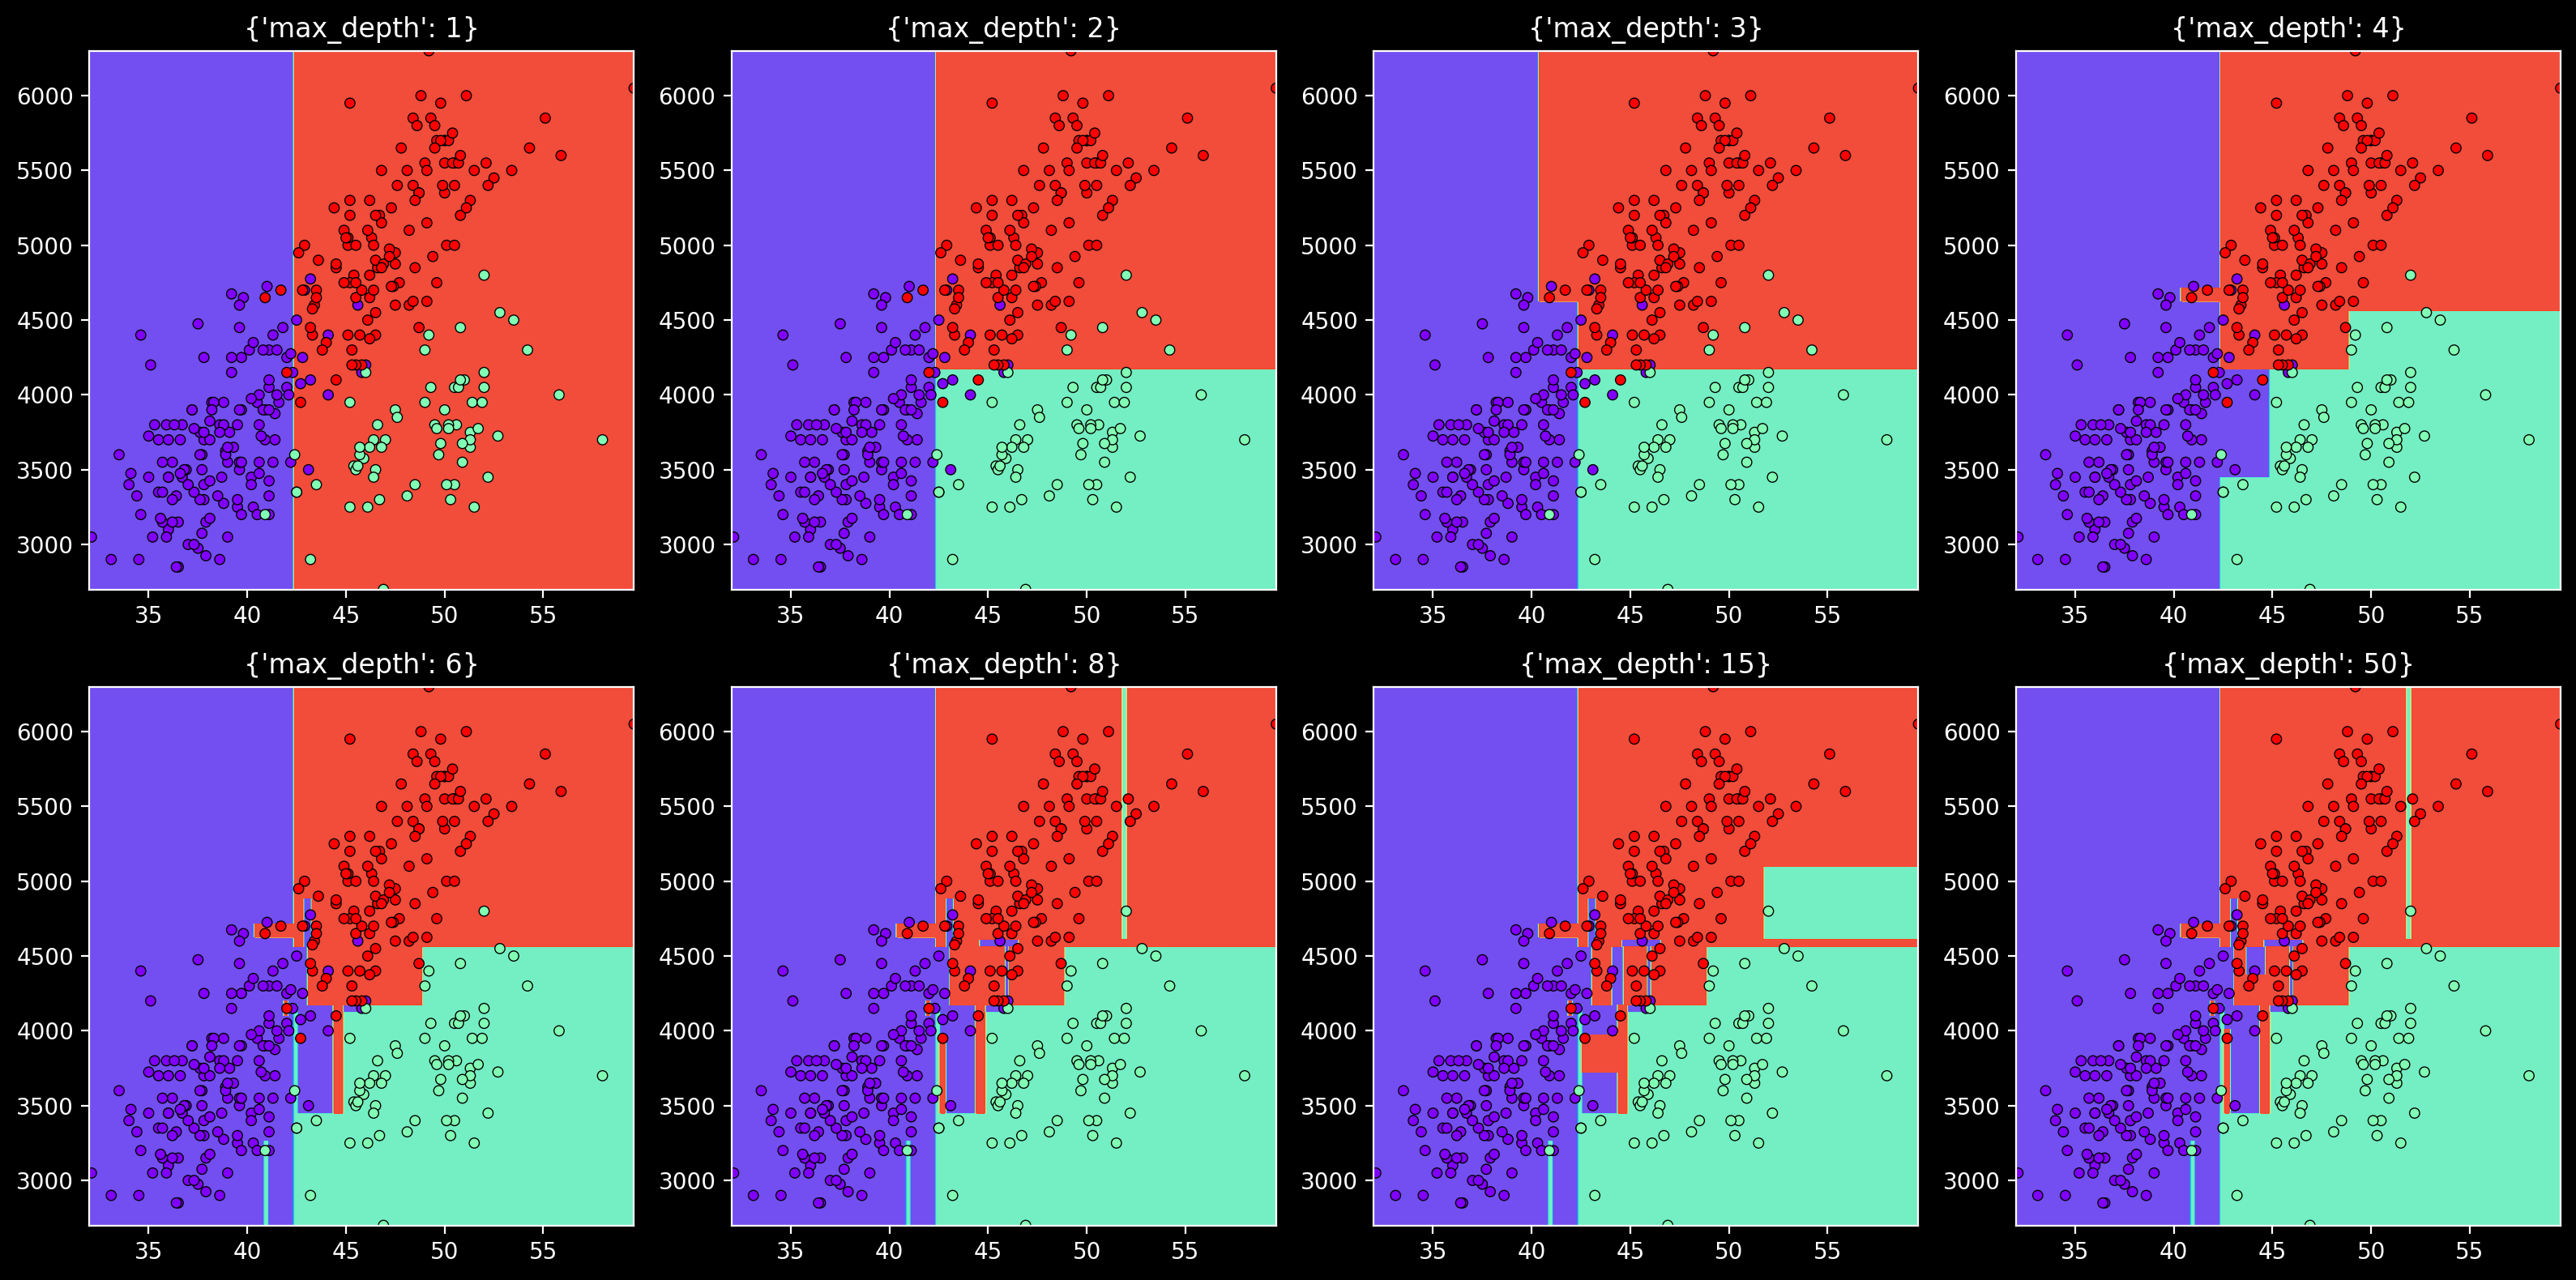

In [14]:
# Define the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# TODO 10: Use depth [1, 2, 3, 4, 6, 8, 15, 50]
hyperparams_list = [
    {'max_depth': 1},
    {'max_depth': 2},
    {'max_depth': 3},
    {'max_depth': 4},
    {'max_depth': 6},
    {'max_depth': 8},
    {'max_depth': 15},
    {'max_depth': 50}
]

# Plot decision boundaries. 
plot_model_contours(dt_model, x_data, y_data, hyperparams_list=hyperparams_list)

```python
TODO 11: Given this, how does depth affect overfitting? Which depth seems the most optimal from the selection above?
```

In [ ]:
'''
Answer goes here.
as depth increases the model becomes more complex and overfits the data.

'''

####  🌀 Confirmatory Analysis for Overfitting

Hyperparameters: 100%|██████████| 8/8 [00:00<00:00, 31.09it/s]


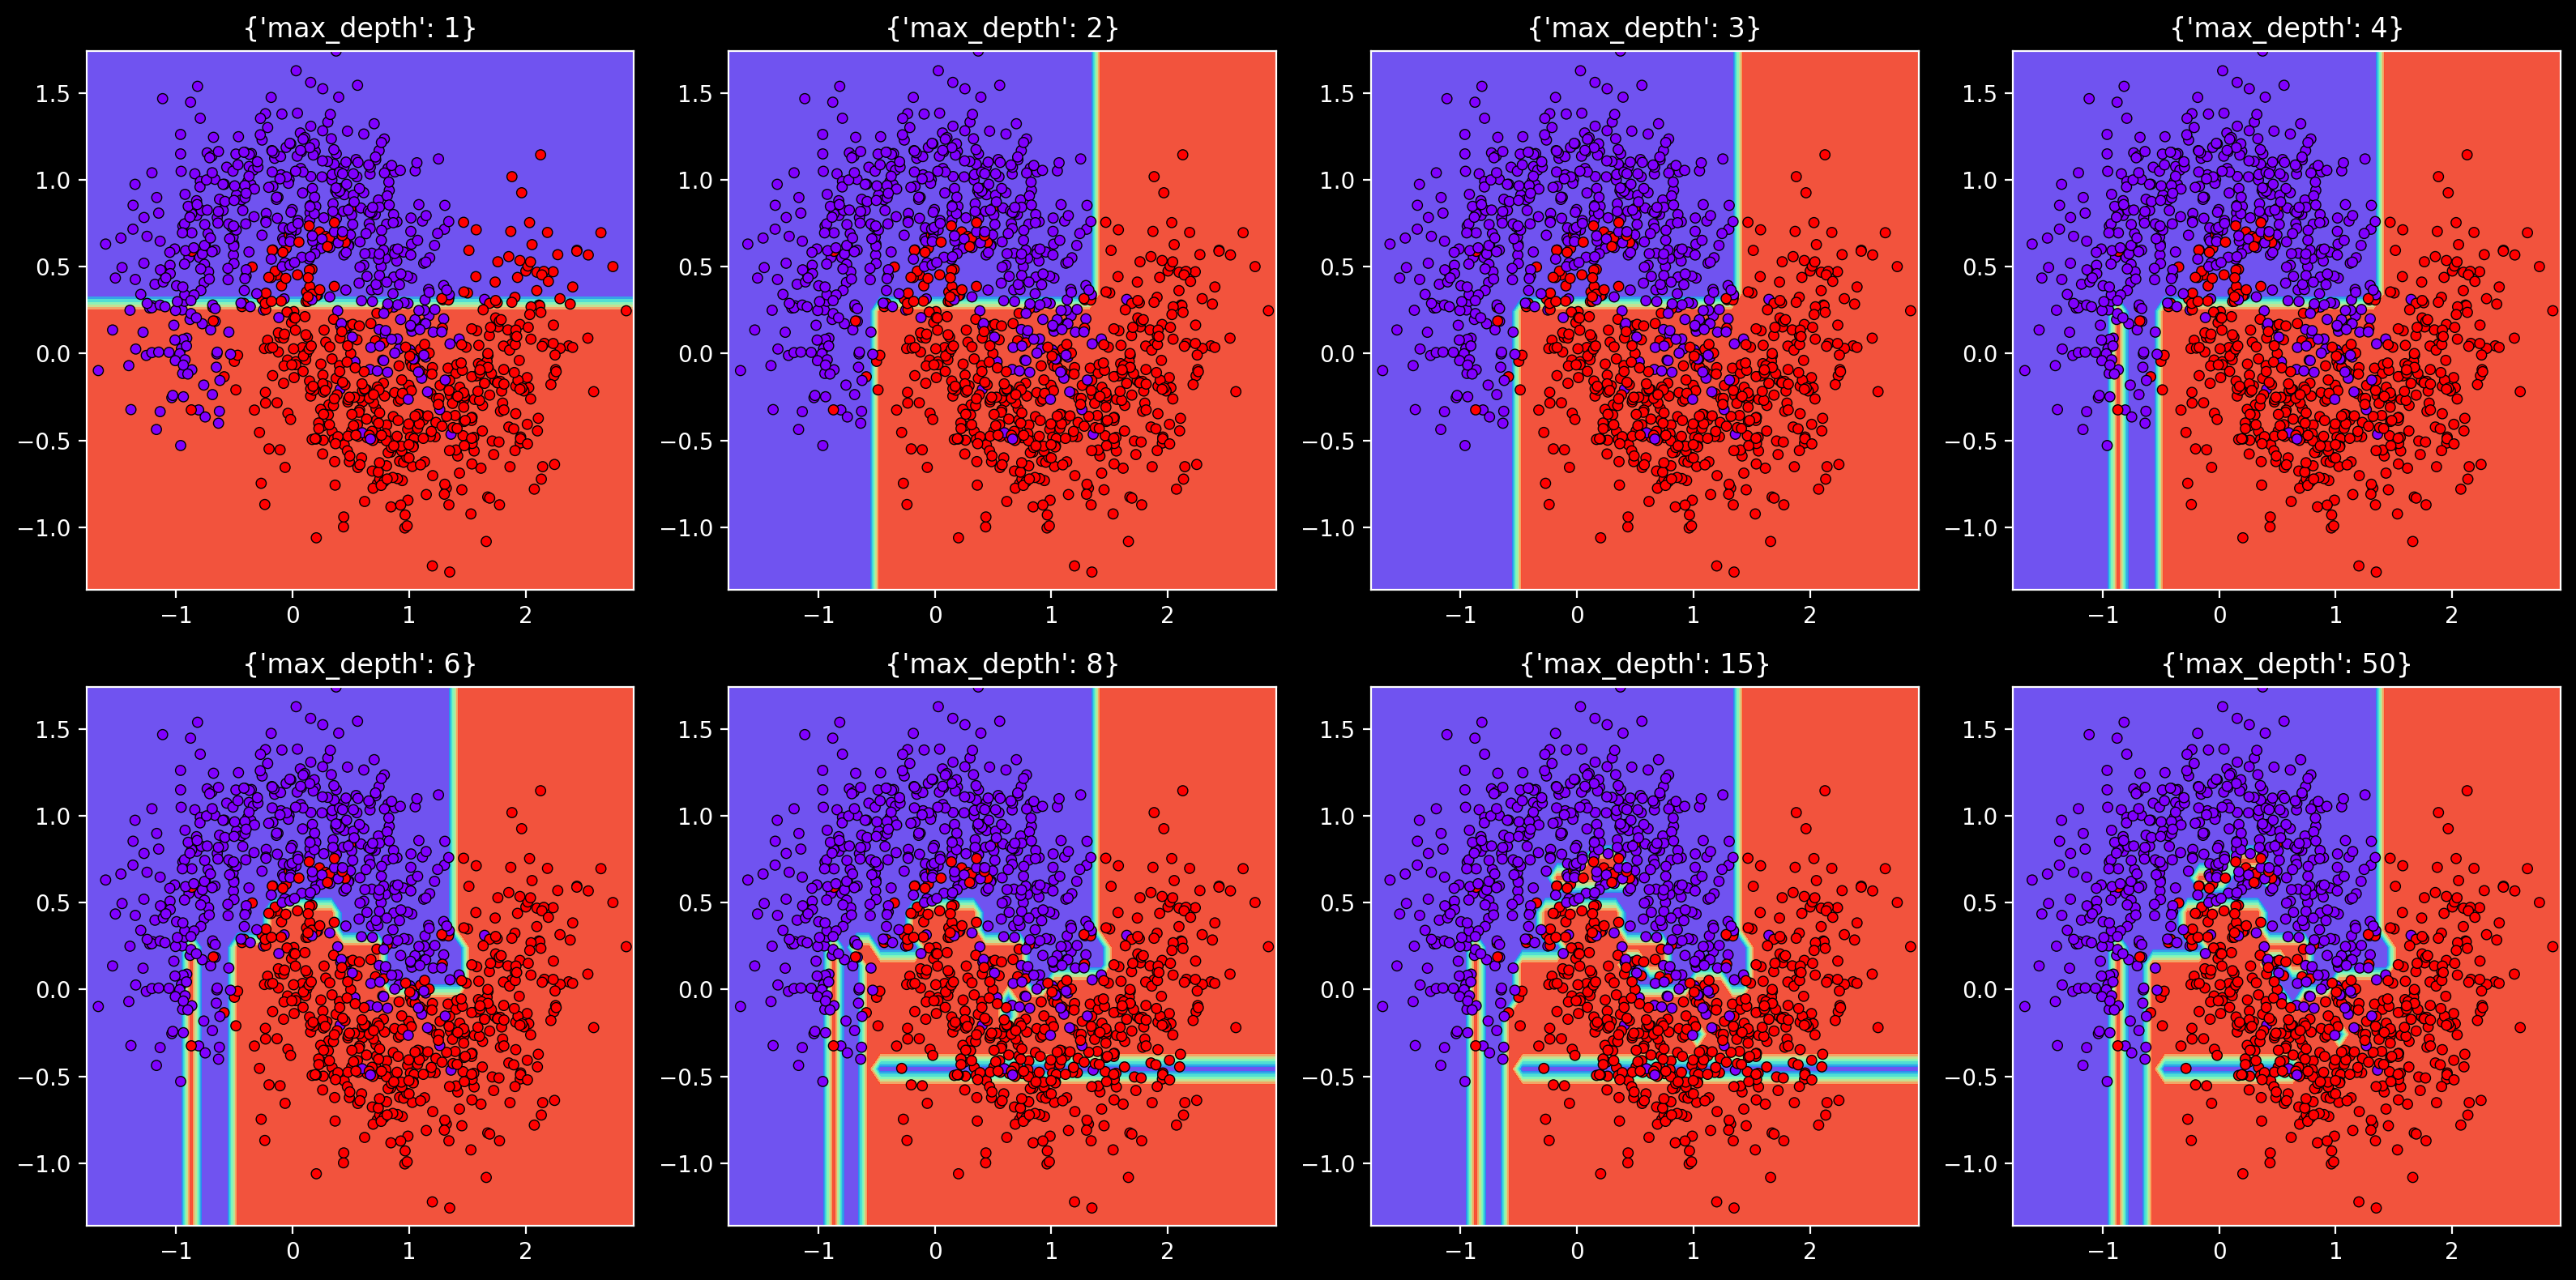

In [15]:
from sklearn.datasets import make_moons

# TODO 12: Call make_moons with n_samples=1000, noise=0.3 and random_state=42
x_data_m, y_data_m = make_moons(n_samples=1000, noise=0.3, random_state=42)
plot_model_contours(DecisionTreeClassifier(), x_data_m, y_data_m, hyperparams_list=hyperparams_list)

<div align="center">
    <img src="https://i.imgur.com/LMiA2O5.gif" width=800/>
</div>